In [1]:
import numpy as np
import networkx as nx
from regain.covariance.missing_temporal_graphical_lasso import MissingTimeGraphicalLasso
from regain.multi_layer.two_layers_time_graphical_lasso import TwoLayersTimeGraphicalLasso
from regain.covariance.kernel_latent_time_graphical_lasso_ import KernelLatentTimeGraphicalLasso
from regain.covariance.kernel_time_graphical_lasso_ import KernelTimeGraphicalLasso
from regain.datasets import make_dataset
from sklearn.gaussian_process import kernels
import warnings 


In [5]:
results_means_TGL = []
results_means_LTGL= []
results_means_MTGL = []
results_means_ELTGL = []
results_std_TGL = []
results_std_LTGL= []
results_std_MTGL = []
results_std_ELTGL = []

results_i_means_TGL = []
results_i_means_LTGL= []
results_i_means_MTGL = []
results_i_means_ELTGL = []
results_i_std_TGL = []
results_i_std_LTGL= []
results_i_std_MTGL = []
results_i_std_ELTGL = []

In [3]:
kernel = kernels.RBF(length_scale=1)(np.arange(10)[:, None])

tgl = KernelTimeGraphicalLasso(alpha=0.5, kernel=kernel, max_iter=100, tol=1e-3)
eltgl = TwoLayersTimeGraphicalLasso(alpha=0.5, kernel=kernel, h=5, verbose=0, tol=1e-2, psi='l1', max_iter=100)
ltgl = KernelLatentTimeGraphicalLasso(alpha=0.5, psi='l1', phi='l1', max_iter=100,
                                      kernel_psi=kernel, kernel_phi=kernel, tau=0.5, verbose=0, tol=1e-3)
mtgl = MissingTimeGraphicalLasso(alpha=0.4, kernel=kernel, verbose=0, tol=1e-2, psi='l1', max_iter=100)
    

In [6]:
import time
warnings.simplefilter("ignore")
for n_dim in [20, 80, 140, 200, 500, 1000]:
    r_LTGL = []
    r_TGL = []
    r_ELTGL =[]
    r_MTGL = []
    iter_LTGL = []
    iter_TGL = []
    iter_ELTGL =[]
    iter_MTGL = []
    for i in range(3):
        res = make_dataset(n_dim_obs=n_dim, n_dim_lat=int(n_dim*0.1), n_samples=100, update_theta='l1')

        t1 = time.time()
        ltgl.fit(res['X'], res['y'])
        r_LTGL.append(time.time() - t1)
        iter_LTGL.append(ltgl.n_iter_)
        
        t1 = time.time()
        eltgl.fit(res['X'], res['y'])
        r_ELTGL.append(time.time() - t1)
        iter_ELTGL.append(eltgl.n_iter_)
        
        
        t1 = time.time()
        tgl.fit(res['X'], res['y'])
        r_TGL.append(time.time() - t1)
        iter_TGL.append(tgl.n_iter_)

        X_ = np.zeros((1000, n_dim+5))
        X_[:] = np.nan 
        X_[:, 5:] = res['X']
        t1 = time.time()
        mtgl.fit(X_, res['y'])
        r_MTGL.append(time.time() - t1)
        iter_MTGL.append(mtgl.n_iter_)

    print("done", n_dim)
    results_means_ELTGL.append(np.mean(r_ELTGL))
    results_std_ELTGL.append(np.std(r_ELTGL))
    results_means_TGL.append(np.mean(r_TGL))
    results_std_TGL.append(np.std(r_TGL))
    results_means_LTGL.append(np.mean(r_LTGL))
    results_std_LTGL.append(np.std(r_LTGL))
    results_means_MTGL.append(np.mean(r_MTGL))
    results_std_MTGL.append(np.std(r_MTGL))
    
    results_i_means_ELTGL.append(np.mean(iter_ELTGL))
    results_i_std_ELTGL.append(np.std(iter_ELTGL))
    results_i_means_TGL.append(np.mean(iter_TGL))
    results_i_std_TGL.append(np.std(iter_TGL))
    results_i_means_LTGL.append(np.mean(iter_LTGL))
    results_i_std_LTGL.append(np.std(iter_LTGL))
    results_i_means_MTGL.append(np.mean(iter_MTGL))
    results_i_std_MTGL.append(np.std(iter_MTGL))

-239.78472036543755
-239.43884761477818
-239.4390898509621
-239.43908985096215
-239.43908985096215
-239.43908985096215
-239.43908985096215
-239.43908985096215
-239.43908985096215
-239.43908985096215
-239.43908985096215
-239.43908985096215
-239.43908985096215
-239.43908985096215
-239.43908985096215
-239.43908985096215
-239.43908985096215
-239.43908985096215
-239.43908985096215
-239.43908985096215
-239.43908985096215
-239.43908985096215
-239.43908985096215
-239.43908985096215
-239.43908985096215
-239.43908985096215
-239.43908985096215
-239.4390898509621
-239.4390898509621
-239.4390898509621
-236.3381935710958
-235.91247285268383
-235.91489205016
-235.91489205016
-235.91489205016
-235.91489205016
-235.91489205016
-235.91489205016
-235.91489205016
-235.91489205016
-235.91489205016
-235.91489205016
-235.91489205016
-235.91489205016
-235.91489205016
-235.91489205016
-235.91489205016
-235.91489205016
-235.91489205016
-235.91489205016
-235.91489205016
-235.91489205016
-235.91489205016
-235.914

-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198
-2115.4933119389198


-6561.797223733533
-6561.797223733533
-6561.797223733533
-6561.797223733533
-6561.797223733533
-6561.797223733533
-6561.797223733533
-6561.797223733533
-6561.797223733533
-6561.797223733533
-6561.797223733533
-6561.797223733533
-6561.797223733533
-6561.797223733533
-6561.797223733533
-6561.797223733533
-6561.797223733533
-6561.797223733533
-6561.797223733533
-6561.797223733533
-6561.797223733533
-6561.797223733533
-6561.797223733533
-6561.797223733533
-6561.797223733533
-6561.797223733533
-6561.797223733533
-6561.797223733533
-6561.797223733533
-6561.797223733533
-6561.797223733533
-6561.797223733533
-6561.797223733533
-6561.797223733533
-6561.797223733533
-6561.797223733533
-6561.797223733533
-6561.797223733533
-6561.797223733533
-6561.797223733533
done 200
-50896.17285019701
-50887.504710822184
-50887.504710822184
-50887.504710822206
-50887.50471082219
-50887.50471082219
-50887.504710822206
-50887.5047108222
-50887.5047108222
-50887.50471082219
-50887.50471082222
-50887.50471082219
-

-127484.1255384197
-127484.12553841968
-127484.12553841973
-127484.12553841973
-127484.12553841973
-127484.12553841973
-127484.12553841973
-127484.12553841973
-127484.12553841973
-127484.12553841973
-127484.12553841973
-127484.12553841973
-127484.12553841973
-127484.12553841973
-127484.12553841973
-127484.12553841973
-127484.12553841973
-127484.12553841973
-127484.12553841973
-127484.12553841973
-127484.12553841973
-127484.12553841968
-127484.12553841973
-127484.1255384197
done 1000


In [ ]:
results_means_ELTGL

In [8]:
from importlib import reload
import regain.covariance.missing_graphical_lasso_; reload(regain.covariance.missing_graphical_lasso_)

import regain.covariance.missing_temporal_graphical_lasso; reload(regain.covariance.missing_temporal_graphical_lasso)
from regain.covariance.missing_temporal_graphical_lasso import MissingTimeGraphicalLasso
kernel = kernels.RBF(length_scale=1)(np.arange(10)[:, None])


In [ ]:
len(results_means_ELTGL)

In [ ]:
len(results_means_LTGL)

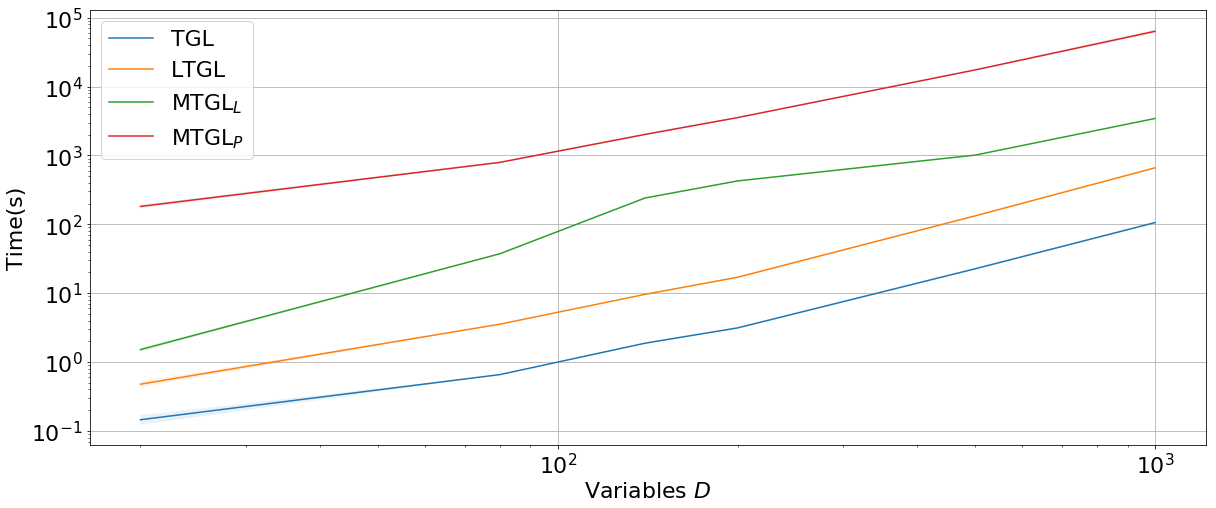

In [11]:
import matplotlib.pyplot as plt 

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

x =  [20, 80, 140, 200, 500, 1000]
fig, ax = plt.subplots(figsize=(20,8))
a = np.array(results_means_TGL)
b= results_std_TGL
plt.plot( x,a,label='TGL')
plt.fill_between(x, a+b, a-b, alpha=0.1)

a = np.array(results_means_LTGL)
b = results_std_LTGL
plt.plot(x,a,label='LTGL')
plt.fill_between(x, a+b, a-b, alpha=0.1)

a = np.array(results_means_ELTGL)
b = results_std_ELTGL
plt.plot(x, a,label=r'MTGL$_L$')
plt.fill_between(x, a+b, a-b, alpha=0.1)



a = np.array(results_means_MTGL)
b= results_std_MTGL
plt.plot( x,a, label=r'MTGL$_P$')
plt.fill_between(x, a+b, a-b, alpha=0.1)

ax.set_yscale('log')
ax.set_xscale('log')
plt.grid()
plt.xlabel(r'Variables $D$')
plt.ylabel('Time(s)')
plt.legend()
plt.savefig('../../../../Dropbox (DIBRIS)/PhD/PhD thesis/Images/scalability/tgl-ltgl-mtgl.pdf', dpi=200,
            transparent=True, bbox_inches='tight' )
plt.show()

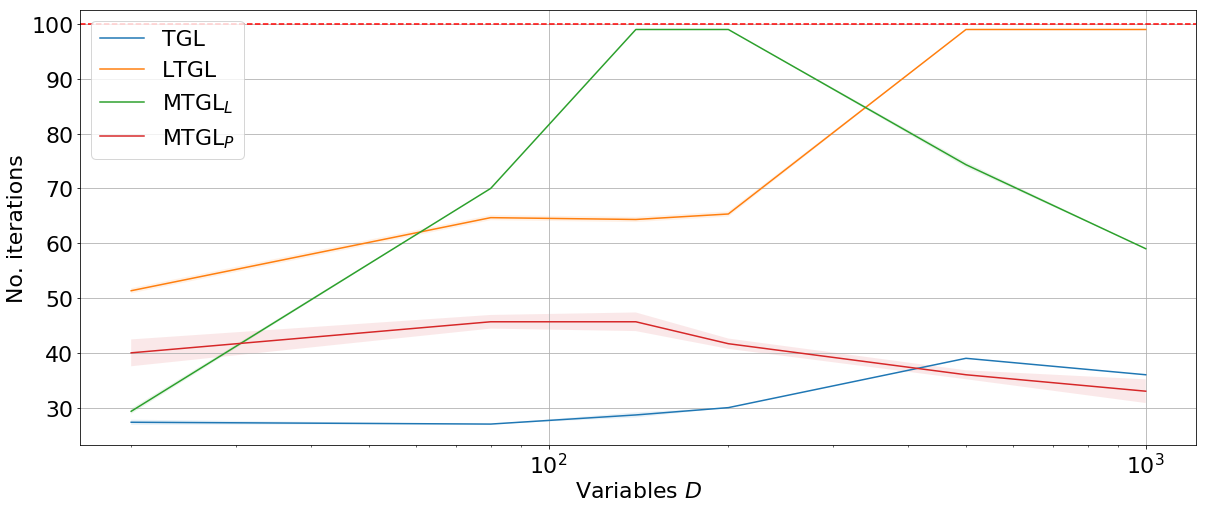

In [15]:
plt.rcParams.update({'font.size': 22})

x =  [20, 80, 140, 200, 500, 1000]
fig, ax = plt.subplots(figsize=(20,8))
a = np.array(results_i_means_TGL)
b= results_i_std_TGL
plt.plot( x,a,label='TGL')
plt.fill_between(x, a+b, a-b, alpha=0.1)

a = np.array(results_i_means_LTGL)
b = results_i_std_LTGL
plt.plot(x,a,label='LTGL')
plt.fill_between(x, a+b, a-b, alpha=0.1)

a = np.array(results_i_means_ELTGL)
b = results_i_std_ELTGL
plt.plot(x, a,label=r'MTGL$_L$')
plt.fill_between(x, a+b, a-b, alpha=0.1)



a = np.array(results_i_means_MTGL)
b= results_i_std_MTGL
plt.plot( x,a, label=r'MTGL$_P$')
plt.fill_between(x, a+b, a-b, alpha=0.1)

ax.set_xscale('log')
plt.axhline(100, c='red', linestyle='dashed')
plt.grid()
plt.xlabel(r'Variables $D$')
plt.ylabel('No. iterations')
plt.legend()
plt.savefig('../../../../Dropbox (DIBRIS)/PhD/PhD thesis/Images/scalability/tgl-ltgl-mtgl-iter.pdf', dpi=200,
            transparent=True, bbox_inches='tight' )
plt.show()

In [ ]:
a+b

In [ ]:
results_MTGL2= []
for r in results_MTGL:
    results_MTGL2.append(r[:, 5:,5:])

# results_ELTGL2= []
# for r in results_ELTGL:
#     results_ELTGL2.append(r[:, 5:,5:])
results_MTGL2_10= []
for r in results_MTGL_10:
    results_MTGL2_10.append(r[:, 10:,10:])

results_MTGL2_20= []
for r in results_MTGL_20:
    results_MTGL2_20.append(r[:, 20:,20:])

In [ ]:
len(thetas), len(results_ELTGL2), len(results_MTGL2), len(results_LTGL)

In [ ]:
from importlib import reload
import regain.plotting.results; reload(regain.plotting.results)
from regain.plotting.results import plot_curve

plot_curve(thetas, {r'MTGL$_P(5)$': results_MTGL2, 
                    r'MTGL$_P(10)$': results_MTGL2_10, 
                    r'MTGL$_P(20)$': results_MTGL2_20, 
                          r'MTGL$_L(5)$': results_ELTGL,
                     r'MTGL$_L(10)$': results_ELTGL_10,
                     r'MTGL$_L(20)$': results_ELTGL_20,
                          r'LTGL': results_LTGL,}, multiple=True, 
          filename="/home/vero/Dropbox (DIBRIS)/PhD/PhD thesis/Images/temporal-models/roc_latent_comparison.pdf", 
          fontsize=22)

In [ ]:
from regain.plotting.results import plot_curve

plot_curve(thetas, {r'MTGL$_P(5)$': results_MTGL2, 
                    r'MTGL$_P(10)$': results_MTGL2_10, 
                    r'MTGL$_P(20)$': results_MTGL2_20, 
                          r'MTGL$_L(5)$': results_ELTGL,
                     r'MTGL$_L(10)$': results_ELTGL_10,
                     r'MTGL$_L(20)$': results_ELTGL_20,
                          r'LTGL': results_LTGL,}, multiple=True, mode='pr',
                     filename="/home/vero/Dropbox (DIBRIS)/PhD/PhD thesis/Images/temporal-models/pr_latent_comparison.pdf", 
          fontsize=22)

In [ ]:
import regain.utils; reload(regain.utils)
from regain.utils import mean_structure_error
mean_structure_error(thetas, results_MTGL2, multiple=True)

In [ ]:

mean_structure_error(thetas, results_MTGL2_10, multiple=True)

In [ ]:

mean_structure_error(thetas, results_MTGL2_20, multiple=True)

In [ ]:
mean_structure_error(thetas, results_ELTGL, multiple=True)

In [ ]:
mean_structure_error(thetas, results_LTGL, multiple=True)

In [ ]:
X_mis[0,:]

In [ ]:
mgl.complete_data_matrix_[0, :]